# Imports

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

# Class of Hophield Neural Net

In [162]:
class Hopfield_Net:
    def __init__(self, memory: np.ndarray, sync: bool = True) -> None:
        """class of Hopfield net

        Args:
            memory (np.ndarray): massive with binary vectors to remember
            sync (bool, optional): type of work (sync or async). Defaults to True.
        """
        self.memory = memory
        if   self.memory.size > 1:
             self.neuron_count = self.memory.shape[1] 
        else:
             self.neuron_count = len(self.memory)
             
        self.state = np.random.randint(-2,2,(self.neuron_count,1)) #state vector
        # self.weights = np.zeros((self.neuron_count, self.neuron_count)) 
        # #weights vector
        self.weights = (1 / self.memory.shape[0]) * self.memory.T @ self.memory
        np.fill_diagonal(self.weights, 0)
        self.energies = [] #container for tracking of energy
        self.sync = sync
        
       
    def load(self, state: np.ndarray) -> None:
        """load new state to model

        Args:
            state (np.ndarray): new state of Net
        """        
        self.state = np.reshape(state, (self.neuron_count, 1)) #state vector


    def update(self, neuron_count: int = -1) -> np.ndarray:
        """update state of neurons

        Args:
            neuron_count (int, optional): count of neurons to be updated. Defaults to -1. (all net update)
            
        Returns:
            np.ndarray: new state of model
        """
        updates = []
        
        if neuron_count == -1:
            neuron_count = self.neuron_count
        
        for neuron in range(neuron_count): #update n neurons randomly
            if neuron_count >= self.neuron_count:
                index = neuron
            else:
                index = np.random.randint(0,self.neuron_count)
            #Compute activation for randomly indexed neuron
            activation = self.weights[index,:] @ self.state 
            
            new_state = 1 if activation > 0 else -1
            
            if not self.sync:
                self.state[index] = new_state
            else:
                updates.append((index, new_state))
                
        if self.sync:
            for i, state in updates:
                self.state[i] = state
        
        self.energy()
        
        return self.state
            
    def energy(self) -> None:
        """Compute energy and add it to list of energies
        """
        energy = -0.5 * self.state.T @ self.weights @ self.state
        self.energies.append(energy[0][0])

# Generate data to check the net

In [163]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [164]:
train_X = np.where(train_X > 0, 1, -1)
test_X = np.where(test_X > 0, 1, -1)

In [165]:
X = []

for i in range(len(test_X)):
    X.append(test_X[i].reshape(-1).reshape(1, 784)[0])
    
X = np.array(X)
X[0]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [166]:
test_y[:62]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8], dtype=uint8)

In [167]:
index_to_load = [3, 2, 1, 18, 4, 8, 11, 0]
memory_list = np.array([X[i] for i in index_to_load])

# Check the net

In [168]:
net = Hopfield_Net(memory_list, sync=True)

In [169]:
net.load(X[10])

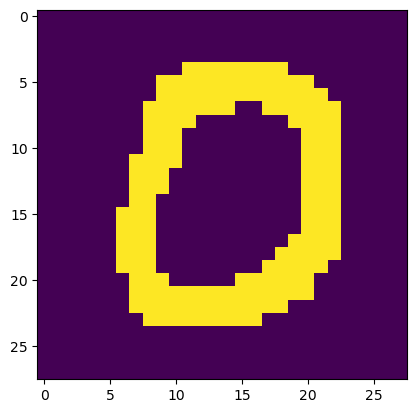

In [170]:
plt.imshow(test_X[10])

In [171]:
epoch = 10
for i in range(epoch):
    state = net.update(10)

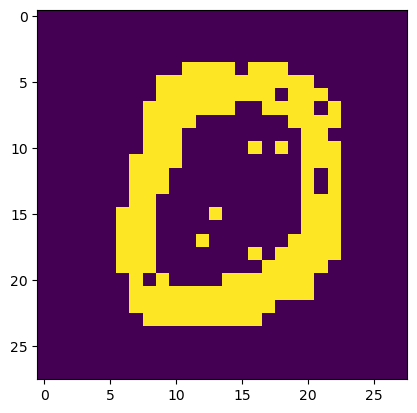

In [172]:
plt.imshow(state.reshape((28, 28)))

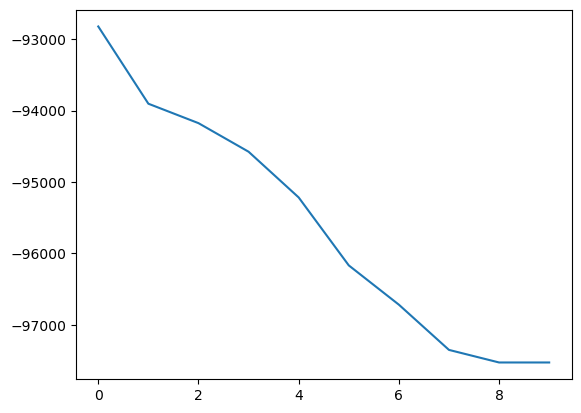

In [173]:
x_ax = [i for i in range(epoch)]
plt.plot(x_ax, net.energies)
